# HANDWRITTERN DIGIT RECOGNITION

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from sklearn.externals import joblib
import warnings

K.set_image_dim_ordering('th')

C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### LOADING THE MNIST DATASET

In [2]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

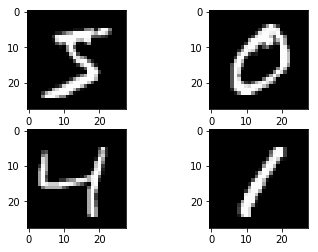

In [3]:
# plot any 4 random images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [4]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [5]:
# load data and splitiing it into train and test
#(X_train, y_train), (X_test, y_test) = mnist.load_data()

### RESHAPING THE DATSET

In [6]:
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [7]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

### Converting to one hot encoding

In [8]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

### Creating a CNN model

In [9]:
# define the model

# create model
model = Sequential()

# Applying first Convolution opertation
model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Applying Second Convolution opertation
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#dropout
model.add(Dropout(0.2))

#flattening
model.add(Flatten())

#Fully connected neural Networks
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# Fit the model
H = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=9, batch_size=200)

Train on 60000 samples, validate on 10000 samples
Epoch 1/9
60000/60000 [==============================] - 77s 1ms/step - loss: 0.3870 - acc: 0.8820 - val_loss: 0.0906 - val_acc: 0.9709
Epoch 2/9
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0986 - acc: 0.9702 - val_loss: 0.0549 - val_acc: 0.9819
Epoch 3/9
60000/60000 [==============================] - 89s 1ms/step - loss: 0.0725 - acc: 0.9775 - val_loss: 0.0416 - val_acc: 0.9870
Epoch 4/9
60000/60000 [==============================] - 89s 1ms/step - loss: 0.0593 - acc: 0.9819 - val_loss: 0.0370 - val_acc: 0.9868
Epoch 5/9
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0511 - acc: 0.9842 - val_loss: 0.0345 - val_acc: 0.9891
Epoch 6/9
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0434 - acc: 0.9860 - val_loss: 0.0296 - val_acc: 0.9906
Epoch 7/9
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0383 - acc: 0.9880 - val_loss: 0.0293 - val_acc: 0.990

In [12]:
joblib.dump(model, 'model.pkl')

['model.pkl']

In [13]:
# final evaluation
metrics = model.evaluate(X_test, y_test, verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

Metrics(Test loss & Test Accuracy): 
[0.02277794284175034, 0.9929]


### PLOTTING

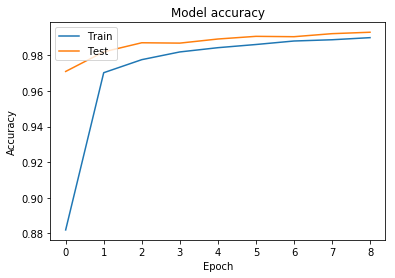

In [14]:
# Plot training & validation accuracy values
plt.plot(H.history['acc'])
plt.plot(H.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

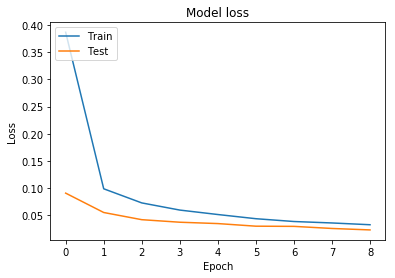

In [15]:
# Plot training & validation loss values
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### TESING ON A RANDOM IMAGE

In [28]:
def Convert_one_to_label(a):
    max = 0
    for i in range(0,len(a)):
        if(a[i]>max):
            label = i;
            max = a[i]
    return label

In [29]:
def make_predictions(example):
    example = example.reshape(1,1,28,28)
    pred = model.predict(example)
    plt.imshow(pred, cmap=plt.get_cmap('gray'))
    return Convert_one_to_label(pred[0])

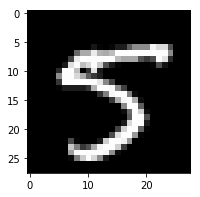

In [35]:
import cv2
plt.figure(figsize=(3, 3))
plt.imshow(X_test[102][0], cmap=plt.get_cmap('gray'))
cv2.imwrite('five.png',X_test[102][0])

5

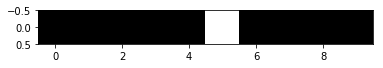

In [31]:
make_predictions(X_test[102])